In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from shap_explainer import ShapTreeExplainer
from tqdm import tqdm

shap.initjs()

In [16]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 

In [19]:
# create dummy variables
X["Sex.M"] = [1 if s == "M" else 0 for s in X["Sex"]]
X["Sex.F"] = [1 if s == "F" else 0 for s in X["Sex"]]
X["Sex.I"] = [1 if s == "I" else 0 for s in X["Sex"]]
X = X.drop("Sex", axis=1)



In [22]:
#Multiclass categorical target varibale
y_cat = [2 if y_>12 else 1 if y_>8 else 0 for y_ in y['Rings']]

#Train model 
model_cat = xgb.XGBClassifier(objective="binary:logistic")
model_cat.fit(X, y_cat)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [23]:
#Get shap values
explainer = shap.Explainer(model_cat)
shap_values_cat= explainer(X)


[07:19:45] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [29]:
explainer = ShapTreeExplainer(model_cat)
shap_values = explainer.explain(X)

[07:32:21] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


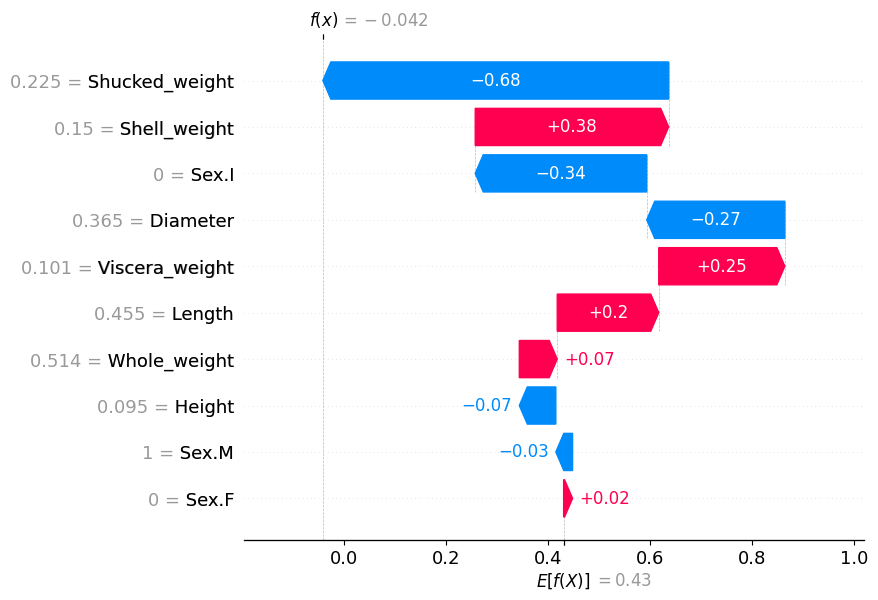

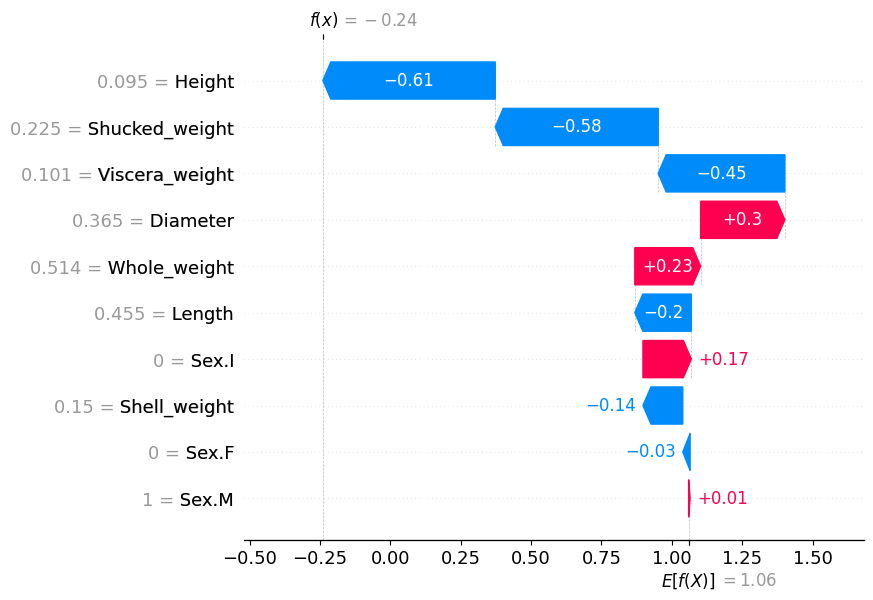

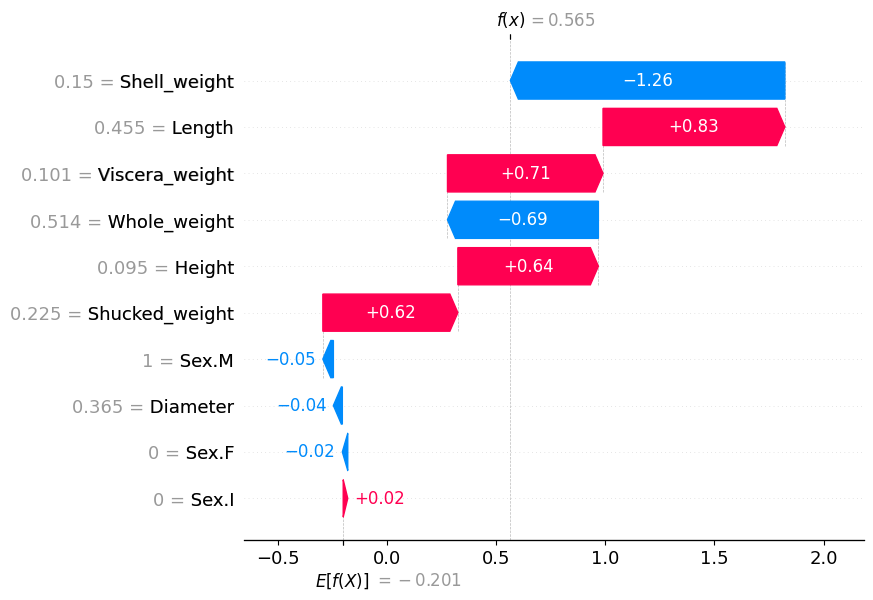

In [24]:
# waterfall plot for class 0
shap.plots.waterfall(shap_values_cat[0,:,0])

# waterfall plot for class 1
shap.plots.waterfall(shap_values_cat[0,:,1])

# waterfall plot for class 2
shap.plots.waterfall(shap_values_cat[0,:,2])